In [1]:
import torch
torch.__version__
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

파이토치 패키지 버전 확인         
https://pytorch.org/get-started/previous-versions/

In [2]:
import torchaudio
torchaudio.__version__

'2.6.0+cu124'

https://keithito.com/LJ-Speech-Dataset/

In [ ]:
torchaudio.datasets.LJSPEECH(root = './',
                             folder_in_archive = 'wavs',
                             url= 'https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2',
                             download=True)

100%|██████████| 2.56G/2.56G [00:54<00:00, 50.6MB/s]


In [ ]:
import pandas as pd
metadata_path = './data/LJSpeech-1.1/metadata.csv'
metadata_df = pd.read_csv(metadata_path, sep="|", header=None, quoting=3)
metadata_df.columns = ["file_name", "transcription", "normalized_transcription"]
metadata_df

,file_name,transcription,normalized_transcription
0,LJ001-0001,"Printing, in the only sense with which we are ...","Printing, in the only sense with which we are ..."
1,LJ001-0002,in being comparatively modern.,in being comparatively modern.
2,LJ001-0003,For although the Chinese took impressions from...,For although the Chinese took impressions from...
3,LJ001-0004,"produced the block books, which were the immed...","produced the block books, which were the immed..."
4,LJ001-0005,the invention of movable metal letters in the ...,the invention of movable metal letters in the ...
...,...,...,...
13095,LJ050-0274,made certain recommendations which it believes...,made certain recommendations which it believes...
13096,LJ050-0275,materially improve upon the procedures in effe...,materially improve upon the procedures in effe...
13097,LJ050-0276,"As has been pointed out, the Commission has no...","As has been pointed out, the Commission has no..."
13098,LJ050-0277,with the active cooperation of the responsible...,with the active cooperation of the responsible...


In [ ]:
for i in range(5):
    file = metadata_df.iloc[0]['file_name']
    audio_file = "data/LJSpeech-1.1/wavs/"+ file + ".wav"
    waveform, sample_rate = torchaudio.load(audio_file)
    print(sample_rate)

22050
22050
22050
22050
22050


In [ ]:
SAMPLE_RATE = 22050

Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition


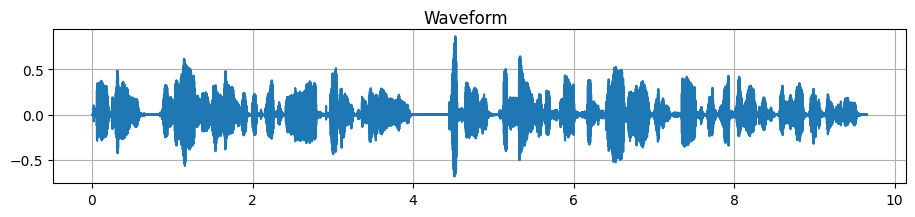

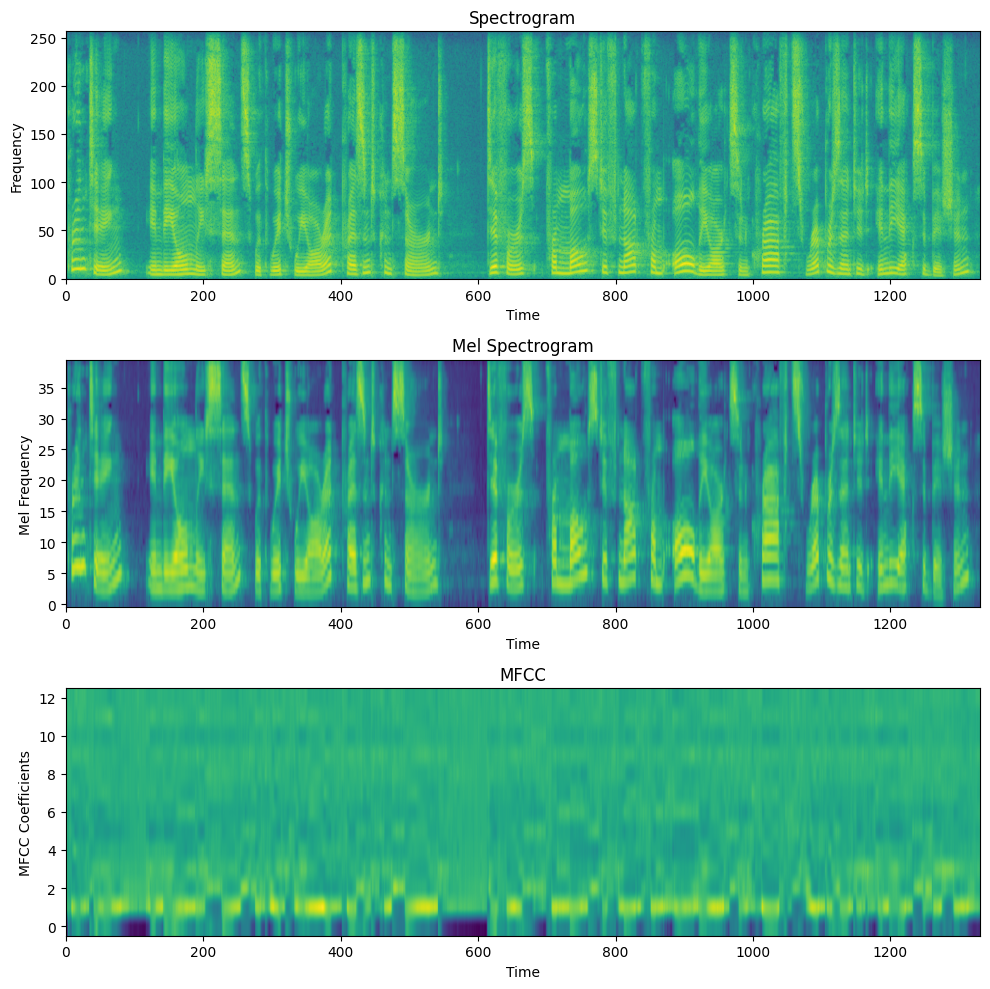

In [ ]:
import torch
import torchaudio
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display

# 오디오 파일 로드
file = metadata_df.iloc[0]['file_name']
print(metadata_df.iloc[0]['transcription'])
audio_file = "data/LJSpeech-1.1/wavs/"+ file + ".wav"
waveform, sample_rate = torchaudio.load(audio_file)

display(Audio(waveform.squeeze().numpy(), rate=sample_rate))

def plot_waveform(waveform, sample_rate, title = "Waveform"):
    waveform = waveform.numpy()
    num_channels, num_frames = waveform.shape
    time = np.arange(0, num_frames) / sample_rate

    fig, axes = plt.subplots(num_channels, 1, figsize=(11, 2))

    if num_channels == 1:
        axes = [axes]
    for ch in range(num_channels):
        axes[ch].plot(time, waveform[ch])
        axes[ch].grid(True)

        if num_channels > 1:
            axes[ch].set_ylabel(f"Channel: {ch+1}")
    plt.suptitle(title)
    plt.show(block = False)

plot_waveform(waveform, sample_rate)

### 1. Spectrogram 생성
spectrogram_transform = torchaudio.transforms.Spectrogram(
    n_fft=512,      # FFT 윈도우 크기
    hop_length=160, # 프레임 간 이동 간격
    power=2         # Spectrogram은 전력 스펙트럼 (크기의 제곱)
)
spectrogram = spectrogram_transform(waveform)

### 2. Mel Spectrogram 생성
mel_spectrogram_transform = torchaudio.transforms.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=512,
    hop_length=160,
    n_mels=40,     # Mel 필터뱅크 개수
    f_min=0.0,
    f_max=sample_rate // 2
)
mel_spectrogram = mel_spectrogram_transform(waveform)

### 3. MFCC 생성
mfcc_transform = torchaudio.transforms.MFCC(
    sample_rate=sample_rate,
    n_mfcc=13,     # 추출할 MFCC 개수
    melkwargs={
        "n_fft": 512,
        "hop_length": 160,
        "n_mels": 40,
        "f_min": 0.0,
        "f_max": sample_rate // 2
    }
)
mfcc = mfcc_transform(waveform)

### 4. 시각적으로 비교 (Spectrogram, Mel Spectrogram, MFCC)
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Spectrogram 시각화
axs[0].imshow(spectrogram.log2()[0,:,:].numpy(), cmap='viridis', origin='lower', aspect='auto')
axs[0].set_title('Spectrogram')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Frequency')

# Mel Spectrogram 시각화
axs[1].imshow(mel_spectrogram.log2()[0,:,:].numpy(), cmap='viridis', origin='lower', aspect='auto')
axs[1].set_title('Mel Spectrogram')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Mel Frequency')

# MFCC 시각화
axs[2].imshow(mfcc[0,:,:].numpy(), cmap='viridis', origin='lower', aspect='auto')
axs[2].set_title('MFCC')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('MFCC Coefficients')

plt.tight_layout()
plt.show()
